In [16]:
import yfinance as yf
import pandas as pd 
import numpy as np
from pathlib import Path
from pandas.tseries.offsets import DateOffset 

In [17]:
cryptocurrencies = ['BTC-USD']
start_date = "2020-07-01"
end_date = "2021-07-31"
bitcoin_data = yf.download(cryptocurrencies, start_date, end_date)

[*********************100%***********************]  1 of 1 completed


In [18]:
bitcoin_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-07-01,9145.985352,9309.754883,9104.735352,9228.325195,9228.325195,15971550355
2020-07-02,9231.139648,9274.962891,9036.623047,9123.410156,9123.410156,16338916796
2020-07-03,9124.842773,9202.344727,9058.794922,9087.303711,9087.303711,13078970999
2020-07-04,9084.233398,9183.295898,9053.629883,9132.488281,9132.488281,12290528515
2020-07-05,9126.090820,9162.183594,8977.015625,9073.942383,9073.942383,12903406143
...,...,...,...,...,...,...
2021-07-27,37276.035156,39406.941406,36441.726562,39406.941406,39406.941406,35097370560
2021-07-28,39503.187500,40816.070312,38862.437500,39995.906250,39995.906250,38702404695
2021-07-29,39995.453125,40593.070312,39352.058594,40008.421875,40008.421875,27167146027


<AxesSubplot:xlabel='Date'>

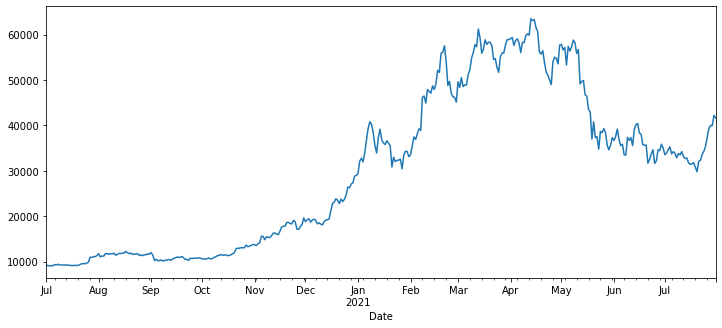

In [19]:
bitcoin_data["Close"].plot(figsize=(12,5))

In [20]:
btc_sentiments = pd.read_csv(
    Path("Resources/BTC_sentiment_analysis.csv")
)

btc_sentiments

,text,date,compound,positive,negative,neutral
0,Blue Ridge Bank shares halted by NYSE after #b...,7/1/20,0.2960,0.145,0.0,0.855
1,"😎 Today, that's this #Thursday, we will do a ""...",7/2/20,0.4939,0.151,0.0,0.849
2,"Guys evening, I have read this article about B...",7/3/20,0.5719,0.227,0.0,0.773
3,$BTC A big chance in a billion! Price: \487264...,7/4/20,0.3164,0.160,0.0,0.840
4,This network is secured by 9 508 nodes as of t...,7/5/20,0.4019,0.109,0.0,0.891
...,...,...,...,...,...,...
737,@PrvinPanghal @elonmusk Use Voyager app bro. I...,7/8/22,0.0000,0.000,0.0,1.000
738,I also hold #Axion instead of just #Bitcoin be...,7/9/22,0.0000,0.000,0.0,1.000
739,@WSBChairman Need to HODL any CRYPTO like #ETH...,7/10/22,0.3612,0.161,0.0,0.839
740,1000 satoshi every 60 minutes. only at https:/...,7/11/22,0.5106,0.155,0.0,0.845


In [21]:
btc_sentiments = btc_sentiments.set_index("date")
btc_sentiments.index = pd.to_datetime(btc_sentiments.index)
btc_sentiments 

,text,compound,positive,negative,neutral
date,,,,,
2020-07-01,Blue Ridge Bank shares halted by NYSE after #b...,0.2960,0.145,0.0,0.855
2020-07-02,"😎 Today, that's this #Thursday, we will do a ""...",0.4939,0.151,0.0,0.849
2020-07-03,"Guys evening, I have read this article about B...",0.5719,0.227,0.0,0.773
2020-07-04,$BTC A big chance in a billion! Price: \487264...,0.3164,0.160,0.0,0.840
2020-07-05,This network is secured by 9 508 nodes as of t...,0.4019,0.109,0.0,0.891
...,...,...,...,...,...
2022-07-08,@PrvinPanghal @elonmusk Use Voyager app bro. I...,0.0000,0.000,0.0,1.000
2022-07-09,I also hold #Axion instead of just #Bitcoin be...,0.0000,0.000,0.0,1.000
2022-07-10,@WSBChairman Need to HODL any CRYPTO like #ETH...,0.3612,0.161,0.0,0.839


In [22]:
btc_sentiments = btc_sentiments.loc["2020-07-01":"2021-07-31"]
btc_sentiments

,text,compound,positive,negative,neutral
date,,,,,
2020-07-01,Blue Ridge Bank shares halted by NYSE after #b...,0.2960,0.145,0.0,0.855
2020-07-02,"😎 Today, that's this #Thursday, we will do a ""...",0.4939,0.151,0.0,0.849
2020-07-03,"Guys evening, I have read this article about B...",0.5719,0.227,0.0,0.773
2020-07-04,$BTC A big chance in a billion! Price: \487264...,0.3164,0.160,0.0,0.840
2020-07-05,This network is secured by 9 508 nodes as of t...,0.4019,0.109,0.0,0.891
...,...,...,...,...,...
2021-07-27,Tip #2: Transaction monitoring is key to robus...,0.3400,0.112,0.0,0.888
2021-07-28,1 BTC Price: Bitstamp 44655.10 USD Coinbase U...,0.0000,0.000,0.0,1.000
2021-07-29,$BTC #Bitcoin #BTC #cryptocurrency\nOh boy 😱🚀🚀...,0.0000,0.000,0.0,1.000


In [23]:
btc_data_sent = pd.concat([bitcoin_data, btc_sentiments], axis=1, join="inner")
btc_data_sent = btc_data_sent.drop(columns=["text"])
display(btc_data_sent.head())
display(btc_data_sent.tail())


,Open,High,Low,Close,Adj Close,Volume,compound,positive,negative,neutral
2020-07-01,9145.985352,9309.754883,9104.735352,9228.325195,9228.325195,15971550355,0.2960,0.145,0.0,0.855
2020-07-02,9231.139648,9274.962891,9036.623047,9123.410156,9123.410156,16338916796,0.4939,0.151,0.0,0.849
2020-07-03,9124.842773,9202.344727,9058.794922,9087.303711,9087.303711,13078970999,0.5719,0.227,0.0,0.773
2020-07-04,9084.233398,9183.295898,9053.629883,9132.488281,9132.488281,12290528515,0.3164,0.160,0.0,0.840
2020-07-05,9126.090820,9162.183594,8977.015625,9073.942383,9073.942383,12903406143,0.4019,0.109,0.0,0.891


,Open,High,Low,Close,Adj Close,Volume,compound,positive,negative,neutral
2021-07-27,37276.035156,39406.941406,36441.726562,39406.941406,39406.941406,35097370560,0.3400,0.112,0.0,0.888
2021-07-28,39503.187500,40816.070312,38862.437500,39995.906250,39995.906250,38702404695,0.0000,0.000,0.0,1.000
2021-07-29,39995.453125,40593.070312,39352.058594,40008.421875,40008.421875,27167146027,0.0000,0.000,0.0,1.000
2021-07-30,40027.484375,42235.546875,38397.355469,42235.546875,42235.546875,33072782960,0.5859,0.142,0.0,0.858
2021-07-31,42196.304688,42231.449219,41110.832031,41626.195312,41626.195312,25802845343,0.3818,0.133,0.0,0.867


In [24]:
y = bitcoin_data["Close"].pct_change().dropna()
y = (y > 0)
y.value_counts()
y = y.loc["2020-07-04":"2021-07-31"]


In [25]:
X = bitcoin_data.shift(periods=2).dropna()
X = X.loc["2020-07-02":"2021-07-30"]

In [26]:
num_test = 33
X_train = X[:-num_test]
y_train = y[:-num_test]
X_test = X[-num_test:]
y_test = y[-num_test:]

In [27]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=4, random_state=17)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, random_state=17)

In [28]:
res = clf.predict(X_test)
acc = (res== y_test.values).mean()
print(acc)

0.5757575757575758


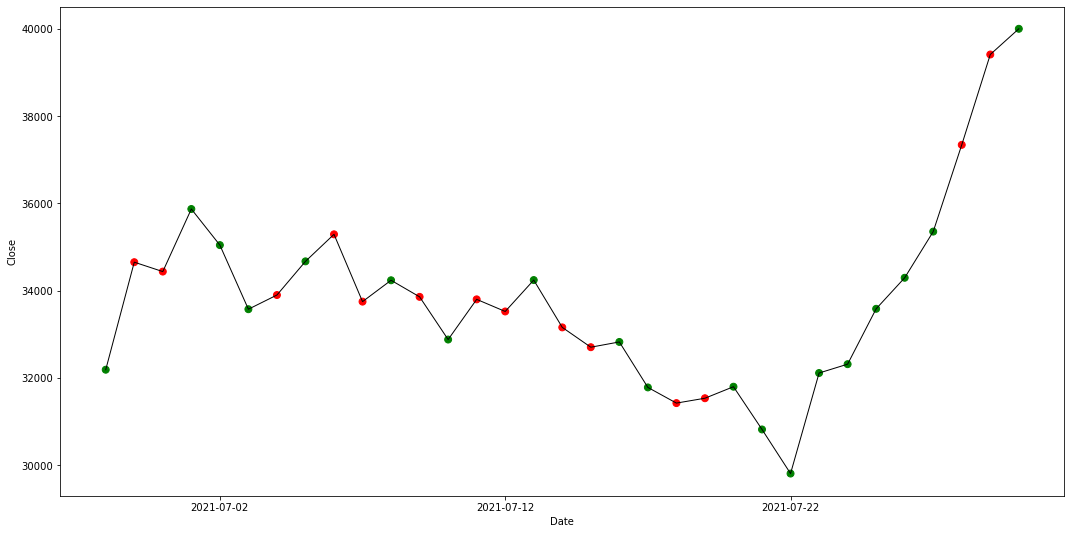

In [29]:
%matplotlib inline
import  matplotlib.pyplot as plt

colors = ['green' if x else 'red' for x in res== y_test]

ax = plt.gca()
ax.plot(X_test['Close'],lw = 1, c = 'black')
X_test.reset_index().plot.scatter( x = 'Date', y = 'Close',color = colors,s = 48,ax= ax,figsize=(18,9))
ax.xaxis.set_major_locator(plt.MaxNLocator(4))

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test, res))

              precision    recall  f1-score   support

       False       0.33      0.08      0.12        13
        True       0.60      0.90      0.72        20

    accuracy                           0.58        33
   macro avg       0.47      0.49      0.42        33
weighted avg       0.49      0.58      0.49        33

